Sylvester Koh

# 1. Introduction

## 1.1 Target
**Project Aim:** To develop new and improved Machine Learning (ML) models to predict airline customer satisfaction.


## 1.2 Business Context
Following the pandemic, competition within the aviation industry has only continued to grow as a result of airlines attempting to retain and garner loyalty amongst their customers. To cultivate customer loyalty, airlines must ensure that their services deliver a high level of customer satisfaction (Noviantoro. & Huang., 2022). The provided dataset portrays a survey related to customer satisfaction, taking into account a variety of factors such as the quality of the airline's in-flight entertainment or the efficiency of online-booking services, and whether or not said customer was satisfied or not. 

With the use of machine learning models, the goal is not just to illuminate the factors that play a major role in producing satisfied customers, but to assist in identifying areas for improvement within the airline, to enhance customer satisfaction. 

## 1.3 Dataset Context
The provided dataset is split between 80% training data and 20% test data. From this, we use these datasets to create 3 different ML models to determine their use in not only enhancing but also predicting improved customer satisfaction. The chosen 3 models are a Logistics Regression model, an Artificial Neural Network(ANN) Model, and a Decision Tree Model. 
### 1.3.1 Import necessary libraries
To begin with, the required libraries for analysing the initial dataset, preparing the data, and creating and evaluating the chosen models later in the report are all imported for convenience.

In [5]:
# For General Data Handling 
import pandas as pd
import numpy as np

# Plotting and Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Preprocessing & Encoding
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce

# Chosen Machine Learning Models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor

# Specificially For TensorFlow (Neural Network Machine Learning Model)
from tensorflow import keras
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras_tuner import Hyperband
from keras.callbacks import EarlyStopping

# Pipeline & Transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model Evaluation 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# General Utilities
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings

### 1.3.2 Load the Dataset
Next the dataset is loaded, as well as combined into a single dataset for easier analysis. 

In [7]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df = pd.concat([df_train, df_test])

df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### 1.3.3 Dataset Shape
The following code reveals the dimensions of both the test and training, and the combined datasets. In total, there are 129880 rows, along with 25 columns. The training set has 103904 columns, whilst the test set has 25976 columns. 

In [9]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(129880, 25)
(103904, 25)
(25976, 25)


### 1.3.4 Dataset Information
The following code is used to obtain a broad perspective of the overall dataset.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

All columns have a total of 129880 entries, apart from the 'Arrival Delay in Minutes' column, missing 393 values, as shown below with the following code

In [13]:
df.isna().sum() #A simpler way to find missing values

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

# 2. Data Preparation

## 2.1 Clean data
Column names in the training and test datasets are cleaned to avoid processing errors. This included removing spaces amd special characters, and converting all names to lowercase. Standardizing column names prevent issues during data preparation and model training.

The 'unnamed:0' and 'id' columns are removed. The unnamed:0 column is created when loading the data and had no analytical value. Similarly, the id column is an index and does not contribute to predicting customer satisfaction and can impacts the model's performance because it is unique for all rows.


In [16]:
clean = lambda cols: [c.strip().replace(" ", "").replace("/", "").replace("-", "").lower()
                      for c in cols]
df_train.columns, df_test.columns = clean(df_train.columns), clean(df_test.columns)

In [17]:
df_train.drop(columns=['unnamed:0', 'id'], inplace=True)
df_test.drop(columns=['unnamed:0', 'id'],  inplace=True)

## 2.2 Binary mapping¶
The 'Gender', 'Customer Type' and 'Type of Travel' columns are transformed to binary variables. This is necessary as the model requires numerical inputs.


In [19]:
binary_map = {
    'gender': {'Male': 1, 'Female': 0},
    'customertype': {'Loyal Customer': 1, 'Disloyal Customer': 0},
    'typeoftravel': {'Business travel': 1, 'Personal Travel': 0}
}
for col, mapping in binary_map.items():
    df_train[col] = df_train[col].map(mapping)
    df_test[col]  = df_test[col].map(mapping)

##  2.3 Encoding Columns
The Class column contains 3 possible values, which is transformed using the one-hot encoding library. The same is also done for gender, customer type and type of travel columns, all of which having only 2 values.

In [21]:
oh = OneHotEncoder(drop=None, sparse_output=False)
train_class = pd.DataFrame(oh.fit_transform(df_train[['gender','customertype','typeoftravel','class']]),
                           columns=oh.get_feature_names_out(['gender','customertype','typeoftravel','class']),
                           index=df_train.index)
test_class  = pd.DataFrame(oh.transform(df_test[['gender','customertype','typeoftravel','class']]),
                           columns=oh.get_feature_names_out(['gender','customertype','typeoftravel','class']),
                           index=df_test.index)

## 2.4 Feature and Target Variables
The data is divided into the target variable -- Satisfaction -- and input features. Class is dropped from the input table because it is replaced with the one-hot encoded columns.

Satisfaction is converted into binary values for the model, grouping neutral and dissatisfied customers because the objective is to maximise satisfaction.

In [23]:
X_train_lr = pd.concat([df_train.drop(columns=['satisfaction', 'class']), train_class], axis=1)
y_train_lr = df_train['satisfaction'].map({'satisfied': 1,
                                     'neutral or dissatisfied': 0})

X_test_lr  = pd.concat([df_test.drop(columns=['satisfaction', 'class']),  test_class], axis=1)
y_test_lr  = df_test['satisfaction'].map({'satisfied': 1,
                                    'neutral or dissatisfied': 0})

## 2.5 Missing Rows
There are rows with missing values which need to be cleaned. Keeping consistent with the code sample, these are replaced with the median values from the training set.

In [25]:
X_train_lr = X_train_lr.fillna(X_train_lr.median(numeric_only=True))
X_test_lr  = X_test_lr.fillna(X_train_lr.median(numeric_only=True)) 

## 2.6 Automatically Drop Highly Correlated Features
Logistic regression is sensitive to multicollinearity, so features which create redundancy by correlation should be removed. E.G. A flight being delayed to depart will also likely cause it to be late to arrive. A threshold is set to 0.85, any features with a higher correlation are removed from both sets.

In [27]:
corr       = X_train_lr.corr().abs()
upper_mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
upper      = corr.where(upper_mask)

threshold        = 0.85
features_to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

print("Dropping due to high correlation (>|0.85|):", features_to_drop)

X_train_lr = X_train_lr.drop(columns=features_to_drop)
X_test_lr  = X_test_lr.drop(columns=features_to_drop)

Dropping due to high correlation (>|0.85|): ['arrivaldelayinminutes', 'gender_0', 'gender_1', 'customertype_nan', 'typeoftravel_0', 'typeoftravel_1', 'class_Eco']


## 2.7 Scaling Remaining Numerical Features 
With the aim of improving the overall performance of the machine learning models that are being showcased, standardization is used on certain parts of the dataset to bring them to scale. This is done using "StandardScaler" as shown below. 

In [29]:
scaler = StandardScaler()
columns_to_normalize = ['age', 'flightdistance', 'inflightwifiservice', 'departure/arrivaltimeconvenient', 
                        'easeofonlinebooking', 'gatelocation', 'foodanddrink', 'onlineboarding', 
                        'seatcomfort', 'inflightentertainment', 'onboardservice', 'legroomservice', 
                        'baggagehandling', 'checkinservice', 'inflightservice', 'cleanliness', 
                        'departuredelayinminutes', 'arrivaldelayinminutes']

# 3. Building Models


## 3.1 Logistic Regression Model
The previous colleague's example models did contain an ensemble machine learning method, which contained a logistic regression model but lacked any inclusion any form of a logistic regression model by itself. Hence, the team decided to create one. 

Using sklearn, the logistic regression model is trained and tuned. This process includes standardising the data so all values are on the same scale as done in the previous line of code. Then, different model settings are tested to find the best combination of parameters. This is done using cross-validation, which evaluates how well the model is likely to perform on new data

### 3.1.1 Creating a Machine Learning Pipeline
The pipeline has two components:
1. Feature Scaling -- StandardScaler -- important to have all features measured on the same scale, so that larger values don't bias the model
2. Logistic Regression Model -- LogisticRegresssion -- set to 2,000 training iterations using all available cores

In [33]:
# Build a pipeline: scaling → logistic regression
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    LogisticRegression(max_iter=2000, n_jobs=-1))
])

### 3.1.2 Define Hyperparameter Search
All possible parameters for the logistic regression model are listed, to iterate through for the best results:

**Penalty Type**: Specifies the type of regularization used to prevent overfitting
-- 'l1' (Lasso) – encourages sparsity by shrinking some coefficients to zero
-- 'l2' (Ridge) – discourages large coefficients but keeps all features
-- 'elasticnet' – combines both L1 and L2 penalties

**Solver**: Determines the algorithm used to optimize the model

**Regularization Strength (C)**: Controls the impact of regularization. Smaller values mean stronger regularization. The values tested are 0.01, 0.1, 1, and 10.

**L1 Ratio**: Applies only when using the elastic net penalty. It determines the balance between L1 and L2 regularization. A range of values was provided, from purely L2 (None) to different mixes of L1 and L2 (0.25, 0.5, 0.75).

In [35]:
param_grid_lr = {
    'clf__penalty' : ['l2', 'l1', 'elasticnet'],
    'clf__solver'  : ['lbfgs', 'saga'],
    'clf__C'       : [0.01, 0.1, 1, 10],
    'clf__l1_ratio': [None, 0.25, 0.5, 0.75]  # used only when penalty='elasticnet'
}

### 3.1.3 Hyperparameter Tuning
5-fold cross-validation is used to compare the different model settings from the parameter grid. The training data is split into 5 parts -- 4 for training the model and 1 for comparing results. 

A grid search is then used to test every combination of parameters. For each combination, the model’s performance is scored by its ROC AUC, which measures how well the model distinguishes between satisfied and non-satisfied customers. After completing the search, the optimal combination of parameters with the highest average ROC AUC score across all 5 folds are printed.

In [37]:
# Use stratified 5‑fold CV
cv_lr = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

grid_lr = GridSearchCV(pipe_lr,
                    param_grid_lr,
                    cv=cv_lr,
                    scoring='roc_auc',
                    n_jobs=-1,
                    verbose=1)

grid_lr.fit(X_train_lr, y_train_lr)

print("Best parameters:", grid_lr.best_params_)
print("Best CV AUC    :", round(grid_lr.best_score_, 4))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/Users/justinnip/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/justinnip/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/justinnip/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/justinnip/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/justinnip/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warni

Best parameters: {'clf__C': 0.01, 'clf__l1_ratio': 0.75, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Best CV AUC    : 0.9266


### 3.1.4 Evaluate the Best Model on Test Data
The best model parameters are saved and applied to the test set. The features are scaled so that results are consistent with the training set. The model generates 2 predictions:
1. **y_pred**: the labels indicating whether each test record is satisfied or non-satisfied(neutral + dissatisfied)
2. **y_prob**: the probabilities of satisfaction or confidence level for each prediction

In [39]:
best_model_lr      = grid_lr.best_estimator_
X_test_scaled_lr   = best_model_lr.named_steps['scaler'].transform(X_test_lr)  # optional if you need scaled matrix
y_pred_lr          = best_model_lr.predict(X_test_lr)
y_train_pred_lr    = best_model_lr.predict(X_train_lr)
y_prob_lr          = best_model_lr.predict_proba(X_test_lr)[:, 1]

### 3.1.5 Logistic Regression Model Results  
The coeffients are stored and sorted to a dataframe, revealing the Top 15 features as a list and bar graph.

In [41]:
coef_df = (pd.DataFrame({'Feature': X_train_lr.columns,
                         'Coefficient': best_model_lr.named_steps['clf'].coef_[0]})
           .sort_values(by='Coefficient', key=abs, ascending=False))
print("\nTop‑15 features")
print(coef_df.head(15))


Top‑15 features
                           Feature  Coefficient
3                     typeoftravel     1.229376
10                  onlineboarding     0.808158
20                customertype_1.0     0.754400
5              inflightwifiservice     0.492011
16                  checkinservice     0.395075
13                  onboardservice     0.380177
21                  class_Business     0.363082
14                  legroomservice     0.323720
18                     cleanliness     0.272561
6   departurearrivaltimeconvenient    -0.175035
7              easeofonlinebooking    -0.160127
19         departuredelayinminutes    -0.155893
15                 baggagehandling     0.153747
17                 inflightservice     0.139041
2                              age    -0.102829


In [42]:
print("-----------Train set Score (Logistic Regression) -----------")
print("Accuracy Score:", metrics.accuracy_score(y_train_lr,y_train_pred_lr))
print("Precision:", metrics.precision_score(y_train_lr,y_train_pred_lr))
print("Recall:", metrics.recall_score(y_train_lr,y_train_pred_lr))
print()
print("-----------Test set Score (Logistic Regression) -----------")
print("Accuracy Score:", metrics.accuracy_score(y_test_lr,y_pred_lr))
print("Precision:", metrics.precision_score(y_test_lr,y_pred_lr))
print("Recall:", metrics.recall_score(y_test_lr,y_pred_lr))

-----------Train set Score (Logistic Regression) -----------
Accuracy Score: 0.8751154912226671
Precision: 0.8704829722793794
Recall: 0.8362243198223209

-----------Test set Score (Logistic Regression) -----------
Accuracy Score: 0.8716507545426547
Precision: 0.8688179906755645
Recall: 0.8334648776637726


## 3.2 Decision Tree Model


### 3.2.1 Establishing a Baseline (Gini)
To establish a starting point, we implemented a baseline Decision Tree using Gini impurity — the default split criterion in sklearn. This model used default hyperparameters and no tuning. This is done with the intention of creating a basic reference model to compare future improvements against. 

In [45]:
# Encode target variable
label_encoder = LabelEncoder()
df["satisfaction"] = label_encoder.fit_transform(df["satisfaction"])  # 0 or 1

# Split features and target
X = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Pipelines for preprocessing
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

preprocessor = ColumnTransformer([
    ("cat", categorical_pipeline, categorical_cols),
    ("num", numerical_pipeline, numerical_cols)
])

# Final pipeline with Decision Tree
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", DecisionTreeClassifier(random_state=42))
])

# Train/test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_val)
print("Gini Tree Accuracy:", accuracy_score(y_val, y_pred))
print("\nGini Classification Report:\n", classification_report(y_val, y_pred))
print("Gini Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Gini Tree Accuracy: 0.9452956575300278

Gini Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     14622
           1       0.94      0.94      0.94     11354

    accuracy                           0.95     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.95      0.95      0.95     25976

Gini Confusion Matrix:
 [[13936   686]
 [  735 10619]]


As a result, the model achieved an accuracy of 94.56% on the validation set. While decent, we expected that performance could be improved with hyperparameter tuning.

### 3.3.2 Establishing a Baseline (Entropy)
We built another baseline using the Entropy criterion, which uses information gain to decide splits. This was done to compare how split criteria (Gini vs Entropy) perform before tuning.

Result:
The Entropy model achieved 94.79% accuracy — slightly better than Gini without tuning.

In [48]:
# Compare Gini (default) vs Entropy-based Decision Tree
# Pipeline using entropy as criterion
entropy_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", DecisionTreeClassifier(criterion="entropy", random_state=42))
])

# Train entropy model
entropy_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred_entropy = entropy_pipeline.predict(X_val)

print("Entropy Tree Accuracy:", accuracy_score(y_val, y_pred_entropy))
print("\nEntropy Classification Report:\n", classification_report(y_val, y_pred_entropy))
print("Entropy Confusion Matrix:\n", confusion_matrix(y_val, y_pred_entropy))

Entropy Tree Accuracy: 0.9477594702802588

Entropy Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     14622
           1       0.94      0.94      0.94     11354

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Entropy Confusion Matrix:
 [[13979   643]
 [  714 10640]]


### 3.3.3 Tuned Decision Tree (Gini + GridSearchCV)
We applied GridSearchCV to find the optimal hyperparameters for the Gini-based Decision Tree. The search explored values for max depth, minimum samples per split, and minimum samples per leaf. This was done to improve the model’s accuracy and generalization by avoiding overfitting or underfitting.

The result of the tuned Gini model achieved 95.099% accuracy — the best performance so far.

In [50]:
# Define hyperparameter search space
param_grid = {
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 10, 20],
    'model__min_samples_leaf': [1, 5, 10]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # use all available cores
)

# Run GridSearch on training data
grid_search.fit(X_train, y_train)

# Show best parameters and CV score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate best model on validation set
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_val)

print("\nTuned Gini Accuracy:", accuracy_score(y_val, y_pred_tuned))
print("\nTuned Gini Classification Report:\n", classification_report(y_val, y_pred_tuned))
print("Tuned Gini Confusion Matrix:\n", confusion_matrix(y_val, y_pred_tuned))

Best Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 5, 'model__min_samples_split': 20}
Best Cross-Validated Accuracy: 0.9511760923613359

Tuned Gini Accuracy: 0.9506467508469356

Tuned Gini Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     14622
           1       0.95      0.94      0.94     11354

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Tuned Gini Confusion Matrix:
 [[14058   564]
 [  718 10636]]


### 3.3.4 Tuned Decision Tree (Entropy + GridSearchCV)
We also tuned the Entropy-based Decision Tree using the same parameter grid to fairly compare Entropy and Gini under optimized conditions.

The result of the tuned Entropy model achieved 95.095% accuracy — slightly lower than the tuned Gini model.

In [52]:
# Create a pipeline using Entropy as the split criterion
entropy_pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", DecisionTreeClassifier(criterion="entropy", random_state=42))
])

# Define the hyperparameter grid
param_grid_entropy = {
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 10, 20],
    'model__min_samples_leaf': [1, 5, 10]
}

# Set up GridSearchCV for the entropy pipeline
grid_search_entropy = GridSearchCV(
    estimator=entropy_pipeline,
    param_grid=param_grid_entropy,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Run GridSearch on training data
grid_search_entropy.fit(X_train, y_train)

# Evaluate
best_entropy_model = grid_search_entropy.best_estimator_
y_pred_entropy_tuned = best_entropy_model.predict(X_val)

print("Best Entropy Parameters:", grid_search_entropy.best_params_)
print("Tuned Entropy Accuracy:", accuracy_score(y_val, y_pred_entropy_tuned))
print("\nTuned Entropy Classification Report:\n", classification_report(y_val, y_pred_entropy_tuned))
print("Tuned Entropy Confusion Matrix:\n", confusion_matrix(y_val, y_pred_entropy_tuned))

Best Entropy Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 20}
Tuned Entropy Accuracy: 0.9506467508469356

Tuned Entropy Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     14622
           1       0.95      0.94      0.94     11354

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Tuned Entropy Confusion Matrix:
 [[14064   558]
 [  724 10630]]


### 3.3.5 Final Model Selection: Tuned Gini
After comparing all four models, the tuned Gini Decision Tree achieved the highest validation accuracy. It also offers slightly faster training time compared to Entropy.

Chosen Model:
Tuned Gini (Accuracy: 95.099%)

This model was used for feature analysis and final test predictions.

### 3.3.6 Tree Visualisation (Top 3 Levels)

We visualised the top 3 levels of the tuned Gini Decision Tree using sklearn’s `plot_tree`.

**Why:**  
To understand how the model makes decisions, and to identify key decision paths.

**Business Insight:**  
The tree showed that features like Online Boarding, Class, and Inflight Entertainment are crucial in predicting satisfaction.

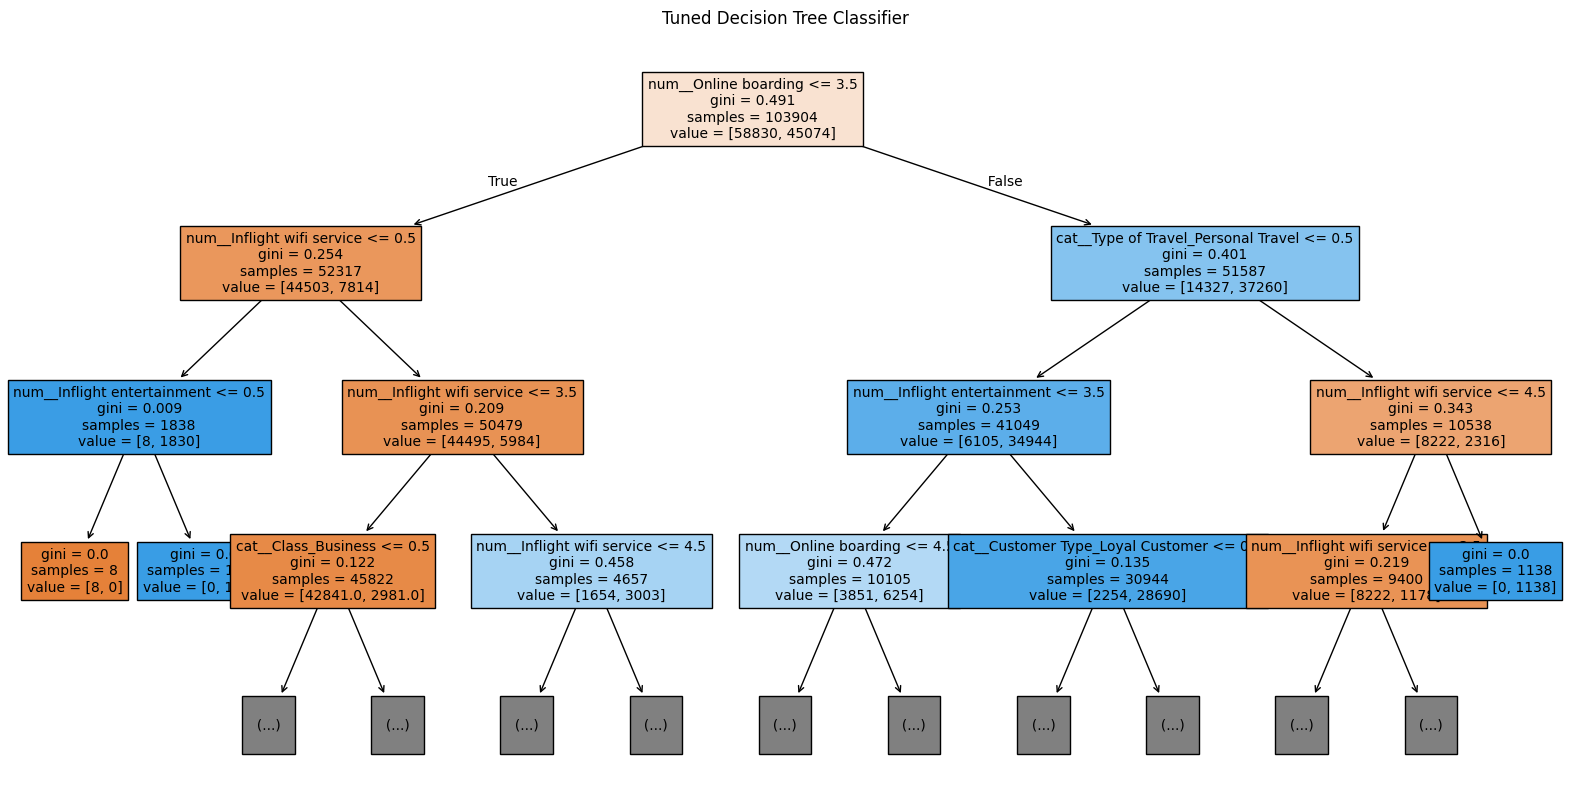

In [55]:
best_model = grid_search.best_estimator_
tuned_tree = best_model.named_steps["model"]

plt.figure(figsize=(20, 10))
plot_tree(
    tuned_tree,
    filled=True,
    feature_names=best_model.named_steps["preprocessing"].get_feature_names_out(),
    max_depth=3,
    fontsize=10
)
plt.title("Tuned Decision Tree Classifier")
plt.show()

### 3.3.7 Feature Importance
Using the decision tree model the top 10 most important features of the airline were plotted. This was done to provide stakeholders and business owners a visual overview of which factors affect customer satsifaction the most, according to the ML model

<Figure size 1000x600 with 0 Axes>

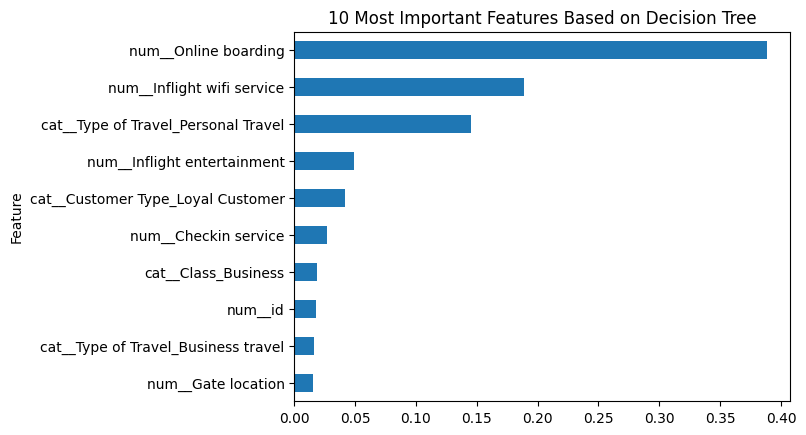

In [57]:
# Feature Importance plot for the best model
importances = best_model.named_steps["model"].feature_importances_
features = best_model.named_steps["preprocessing"].get_feature_names_out()

# Combine and sort
fi_df = pd.DataFrame({"Feature": features, "Importance": importances})
fi_df = fi_df.sort_values(by="Importance", ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
fi_df.head(10).plot(kind="barh", x="Feature", y="Importance", legend=False)
plt.title("10 Most Important Features Based on Decision Tree")
plt.gca().invert_yaxis()
plt.show()

As indicated by the bar graph, the most important features are: 
- Online Boarding
- Inlfight Wifi Service
- Type of Travel 
- Inflight Entertainment

These results can inform which service areas the airline should prioritize to improve customer satisfaction.

### 3.3.8 Prediction vs Test 
The final tuned Gini model was applied to the unseen test dataset. This was performed to simulate real-world predictions and evaluate whether the model generalizes well beyond the training data.

Output:
Each passenger in the test set was labeled as either "satisfied" or "neutral or dissatisfied."

In [60]:
# Load the test dataset
test_df = pd.read_csv("test.csv")

# Use the tuned model to predict satisfaction
test_predictions = best_model.predict(test_df)

# Convert predictions back to original labels
test_predicted_labels = label_encoder.inverse_transform(test_predictions)

# Prepare output for review or export
test_results = pd.DataFrame({
    "PassengerIndex": test_df.index,
    "PredictedSatisfaction": test_predicted_labels
})

# Preview few of the results
print(test_results.head())

   PassengerIndex    PredictedSatisfaction
0               0                satisfied
1               1                satisfied
2               2  neutral or dissatisfied
3               3                satisfied
4               4  neutral or dissatisfied


### 3.3.9 Decision Tree (Pre-Flight Model: Predicting Satisfaction at and after Booking Time)
In this section, we explore whether airline passenger satisfaction can be predicted using only **pre-flight features** (Information available at the time of booking)

Variables Used:

Removed all post-flight survey responses and included only demographic and booking-related variables:

- Gender  
- Customer Type  
- Age  
- Type of Travel (Business/Personal)  
- Class (Business/Eco/Eco Plus)  
- Flight Distance

This model simulates the ability to predict satisfaction **before the flight occurs**, allowing the airline to act proactively.

This was done to determine if the airline can identify dissatisfied passengers early and potentially intervene before the journey begins.

Business Relevance:
- Offer targeted upgrades or perks to improve satisfaction
- Identify at-risk passenger groups early in the customer journey
- Improve service for specific travel profiles (e.g., economy business travelers)

In [62]:
# Pre-Flight Model: Predict satisfaction using only booking-related and demographic features
preflight_features = ["Gender", "Customer Type", "Age", "Type of Travel", "Class", "Flight Distance"]
X_preflight = df[preflight_features]
y_preflight = df["satisfaction"]  # Target remains the same

# Identify categorical and numerical columns
cat_cols_preflight = X_preflight.select_dtypes(include="object").columns.tolist()
num_cols_preflight = X_preflight.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing pipelines
cat_pipeline_preflight = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
num_pipeline_preflight = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

preprocessor_preflight = ColumnTransformer([
    ("cat", cat_pipeline_preflight, cat_cols_preflight),
    ("num", num_pipeline_preflight, num_cols_preflight)
])

# Split dataset
X_train_pf, X_val_pf, y_train_pf, y_val_pf = train_test_split(
    X_preflight, y_preflight, test_size=0.2, random_state=42
)

# Create pipeline with Decision Tree
pipeline_preflight = Pipeline([
    ("preprocessing", preprocessor_preflight),
    ("model", DecisionTreeClassifier(random_state=42))
])

# Fit model
pipeline_preflight.fit(X_train_pf, y_train_pf)

# Predict and evaluate
y_pred_pf = pipeline_preflight.predict(X_val_pf)

print("Pre-Flight Decision Tree Accuracy:", accuracy_score(y_val_pf, y_pred_pf))
print("\nClassification Report:\n", classification_report(y_val_pf, y_pred_pf))
print("Confusion Matrix:\n", confusion_matrix(y_val_pf, y_pred_pf))

Pre-Flight Decision Tree Accuracy: 0.7116569140745304

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.75      0.75     14622
           1       0.68      0.66      0.67     11354

    accuracy                           0.71     25976
   macro avg       0.71      0.71      0.71     25976
weighted avg       0.71      0.71      0.71     25976

Confusion Matrix:
 [[11037  3585]
 [ 3905  7449]]



The same is done again but prior to customers making complete their booking to determine if we can predict satisfaction with **just basic passenger profile data**.
Variables Used:

Includes only variables that are known at the start of the customer journey — from account data. No service experience or flight-specific information is included.

- Gender  
- Age  
- Customer Type (loyal vs. disloyal)  
- Type of Travel (business vs. personal)

Business Relevance:
If the airline can predict satisfaction this early:
- Marketing teams could personalise incentives or upgrade offers
- Loyalty programs can flag potentially dissatisfied new customers
- Proactive service interventions could be designed even before payment is completed

This supports the airline's long-term goal of improving customer retention and first-time flyer experience.

### 3.3.10 Decision Tree (Pre-Booking Model: Predicting Satisfaction at and after Booking Time)
In this section, we explore whether airline passenger satisfaction can be predicted using only **pre-booking features** (Information available at the time of booking)

Variables Used:

Removed all post-flight survey responses and included only demographic variables:

- Gender  
- Customer Type  
- Age  
- Type of Travel (Business/Personal)  

This model simulates the ability to predict satisfaction **before the booking occurs**, allowing the airline to target potential customers.

This was done to determine if the airline can identify potential passengers and convert them into loyal customers with the help of marketing.

Business Relevance:
- Automatically identify target audience for marketing campaigns
- Use customer database to identify potential loyal passengers

In [65]:
# Pre-Booking Model: Predict satisfaction using minimal features known before booking
prebooking_features = ["Gender", "Age", "Customer Type", "Type of Travel"]
X_prebooking = df[prebooking_features]
y_prebooking = df["satisfaction"]  # Scoped target variable for this model

# Identify column types
cat_cols_prebooking = X_prebooking.select_dtypes(include="object").columns.tolist()
num_cols_prebooking = X_prebooking.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Define preprocessing pipelines
cat_pipeline_prebooking = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
num_pipeline_prebooking = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
])

preprocessor_prebooking = ColumnTransformer([
    ("cat", cat_pipeline_prebooking, cat_cols_prebooking),
    ("num", num_pipeline_prebooking, num_cols_prebooking)
])

# Train/test split
X_train_pb, X_val_pb, y_train_pb, y_val_pb = train_test_split(
    X_prebooking, y_prebooking, test_size=0.2, random_state=42
)

# Create pipeline
pipeline_prebooking = Pipeline([
    ("preprocessing", preprocessor_prebooking),
    ("model", DecisionTreeClassifier(random_state=42))
])

# Fit model
pipeline_prebooking.fit(X_train_pb, y_train_pb)

# Predict and evaluate
y_pred_pb = pipeline_prebooking.predict(X_val_pb)

print("Pre-Booking Decision Tree Accuracy:", accuracy_score(y_val_pb, y_pred_pb))
print("\nClassification Report:\n", classification_report(y_val_pb, y_pred_pb))
print("Confusion Matrix:\n", confusion_matrix(y_val_pb, y_pred_pb))

Pre-Booking Decision Tree Accuracy: 0.7816060979365568

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80     14622
           1       0.72      0.81      0.76     11354

    accuracy                           0.78     25976
   macro avg       0.78      0.78      0.78     25976
weighted avg       0.79      0.78      0.78     25976

Confusion Matrix:
 [[11142  3480]
 [ 2193  9161]]


## 3.3 Artificial Neural Network
The example models provided to the team by previous colleagues lacked any use of any artifical neural network models. The team decided the inclusion of the ANN model as a means of identifying non-linear relationships within the dataset, which models such as the logistic regression models ignore (Liu, et al., 2020).


### 3.3.1 Data Preparation for ANN
As the data preparation of ANN is different from regression model, due to looser restrictions on dataset. We will read the data again and redo data cleaning process just for ANN in this section

In [68]:
# Read Dataset
df_train_ann = pd.read_csv('train.csv')
df_test_ann = pd.read_csv('test.csv')

In [69]:
# Drop irrelevant Columns and fill NA with Median
df_train_ann = df_train_ann.drop(columns=['id', 'Unnamed: 0'])
df_test_ann = df_test_ann.drop(columns=['id', 'Unnamed: 0'])
df_train_ann['Arrival Delay in Minutes'] = df_train_ann['Arrival Delay in Minutes'].fillna(df_train_ann['Arrival Delay in Minutes'].median())
df_test_ann['Arrival Delay in Minutes'] = df_test_ann['Arrival Delay in Minutes'].fillna(df_test_ann['Arrival Delay in Minutes'].median())

In [70]:
# Transform catagorical variables into dummy variables
ce_OHE = ce.OneHotEncoder(cols=['Gender','Customer Type', 'Type of Travel','Class'], use_cat_names=True)
train_encoded_ann = ce_OHE.fit_transform(df_train_ann)
test_encoded_ann = ce_OHE.transform(df_test_ann)

In [71]:
# Standardize the numerical variables, as some of them are a lot larger in values
scaler = StandardScaler()

columns_to_normalize = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
                        'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding',
                        'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service',
                        'Baggage handling', 'Checkin service', 'Inflight service',
                        'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

train_encoded_ann[columns_to_normalize] = scaler.fit_transform(train_encoded_ann[columns_to_normalize])
test_encoded_ann[columns_to_normalize] = scaler.transform(test_encoded_ann[columns_to_normalize])

In [72]:
# Set up x and y variables for training and testing set
x_train_ann = train_encoded_ann.drop(columns=['satisfaction'])
y_train_ann = train_encoded_ann['satisfaction'].map({"neutral or dissatisfied": 0, "satisfied": 1})
x_test_ann = test_encoded_ann.drop(columns=['satisfaction'])
y_test_ann = test_encoded_ann['satisfaction'].map({"neutral or dissatisfied": 0, "satisfied": 1})

In [73]:
# Checking the final dataset
print(x_train_ann.shape)
print(y_train_ann.shape)
print(x_test_ann.shape)
print(y_test_ann.shape)

(103904, 27)
(103904,)
(25976, 27)
(25976,)


In [74]:
# Checking the final dataset
x_train_ann.head()

,Gender_Male,Gender_Female,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Age,Type of Travel_Personal Travel,Type of Travel_Business travel,Class_Eco Plus,Class_Business,Class_Eco,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,1,0,-1.745279,1,0,1,0,0,...,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870,0.266393,0.074169
1,1,0,0,1,-0.951360,0,1,0,1,0,...,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.236313
2,0,1,1,0,-0.885200,0,1,0,1,0,...,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.391554
3,0,1,1,0,-0.951360,0,1,0,1,0,...,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.158692
4,1,0,1,0,1.430397,0,1,0,1,0,...,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.391554


### 3.3.2 ANN Model (with All Variables)

#### MLPclassifier
The MLPClassifier from sklearn is being used here to quickly check on the dataset performance. Here, the model is being trained using scores from the training dataset, its performance being evaluated in comparison with the test set. If the score is high, the model has potential for fine-tuning in Tensorflow Hyperparameter Tuning

In [77]:
# clf is a commonly used variable name to indicate that the model is a classifier
clf = MLPClassifier(solver='adam',
                    activation='relu',
                    hidden_layer_sizes=(10,10,10), # edit this line to change the structure of hidden layer(s)
                    learning_rate_init=0.001,
                    random_state=1)
clf.fit(x_train_ann, y_train_ann)
print("*****Score (mean accuracy - train set)*******\n", clf.score(x_train_ann, y_train_ann))
print("*****Score (mean accuracy - test set)*******\n", clf.score(x_test_ann, y_test_ann))

*****Score (mean accuracy - train set)*******
 0.956575300277179
*****Score (mean accuracy - test set)*******
 0.9547659377887281


In [78]:
y_pred_clf_pred = clf.predict(x_test_ann)

In [79]:
print("Accuracy Score:", metrics.accuracy_score(y_test_ann,y_pred_clf_pred))
print("Precision:", metrics.precision_score(y_test_ann,y_pred_clf_pred))
print("Recall:", metrics.recall_score(y_test_ann,y_pred_clf_pred))

Accuracy Score: 0.9547659377887281
Precision: 0.9558744874309146
Recall: 0.9403665702008244


#### Tensorflow Hyperparameter Tuning
As the result in the above MPLclassifier is good, we will use the tensorflow package to find the best parameters for the model. Tensorflow package is chosen instead of gridsearch as Tensorflow has strong computational power with the help of GPU, which is more suitable for our dataset.

The package Tuner in Tensorflow.Keras will be used

In [81]:
# Define the function of ANN structure with range of parameters

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(x_train_ann.shape[1],)))

    # Tune number of layers and nodes
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=8, max_value=128, step=8),
            activation='relu'
        ))

    # Tune dropout rate
    model.add(keras.layers.Dropout(hp.Float("dropout", 0.0, 0.5, step=0.1)))

    # Output layer for binary classification
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [82]:
# Add earlyStopping callback mechanism to shorten the computational time

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,          # Stop after 10 epochs with no improvement
    restore_best_weights=True  # Restore the best weights (from the epoch with the lowest validation loss)
)

In [83]:
# Create directory and define tuner for parameters tuning

tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=200,
    factor=3,
    directory='my_tuner_dir',
    project_name='Tenserflow_with_all_Parameters'
)

Reloading Tuner from my_tuner_dir/Tenserflow_with_all_Parameters/tuner0.json


In [84]:
# Use the same parameter as above

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train_ann, 
                                              y_train_ann, test_size=0.2, random_state=42, 
                                              stratify=y_train_ann)

tuner.search(x_train_split, y_train_split,
             validation_data=(x_val_split, y_val_split),
             epochs=200,
             batch_size=128,
            callbacks=[early_stopping])

#### Best Parameters
Get the best Parameters from the tuner search above

In [86]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print all tuned hyperparameters
for param in best_hps.values:
    print(f"{param}: {best_hps.get(param)}")

num_layers: 3
units_0: 64
dropout: 0.1
learning_rate: 0.01
units_1: 120
units_2: 120
tuner/epochs: 67
tuner/initial_epoch: 23
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0189


In [87]:
# Summary of layers, nodes and parameters
best_model_ann = tuner.get_best_models(num_models=1)[0]
best_model_ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 120)            │         7,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │        14,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,233 (94.66 KB)

 Trainable params: 24,233 (94.66 KB)

 Non-trainable params: 0 (0.00 B)

#### Train the Model with Best Parameters

In [89]:
# Build and train the model with best hyperparameters
best_model_ann = tuner.hypermodel.build(best_hps)

best_model_ann.fit(
    x_train_ann, y_train_ann,
    epochs=400,
    batch_size=128,
)

Epoch 1/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 578us/step - accuracy: 0.9174 - loss: 0.2022  
Epoch 2/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.9528 - loss: 0.1135
Epoch 3/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9575 - loss: 0.1007
Epoch 4/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.9596 - loss: 0.0963
Epoch 5/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.9602 - loss: 0.0946
Epoch 6/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9599 - loss: 0.0932
Epoch 7/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.9619 - loss: 0.0893
Epoch 8/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.9610 - loss: 0.0910
Epoch 9/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9624 - loss: 0.0876
Epoch 10/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9631 - loss: 0.0857
Epoch 11/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.9635 - loss: 0.0866
Epoch 12/400
812/

#### Performance

In [91]:
# predictions using testing set
y_pred_probs_ann = best_model_ann.predict(x_test_ann)
y_pred_ann = (y_pred_probs_ann > 0.5).astype(int)
y_train_pred_probs_ann = best_model_ann.predict(x_train_ann)
y_train_pred_ann = (y_train_pred_probs_ann > 0.5).astype(int)

812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 1s 194us/step


**Classification report and confusion matrix are drawn below for model performance**

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14573
           1       0.98      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



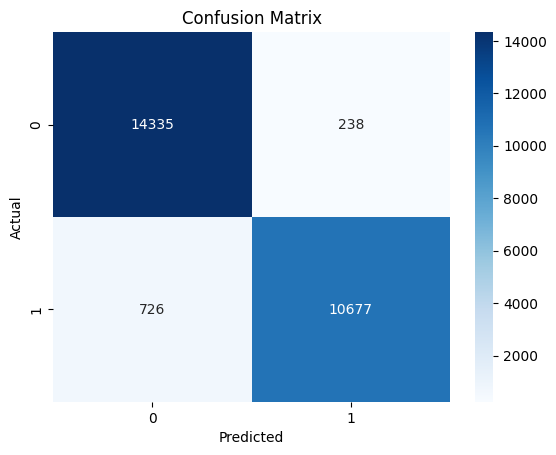

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_ann, y_pred_ann))

# Confusion matrix (optional visualization)
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_ann, y_pred_ann)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Training and Testing set metrics are compared below to ensure no overfitting problem. Since all metrics are within 0.5% difference, we can conclude that no overfitting problem in this model.**

In [95]:
print("-----------Train set Score (ANN with all Variables)-----------")
print("Accuracy Score:", metrics.accuracy_score(y_train_ann,y_train_pred_ann))
print("Precision:", metrics.precision_score(y_train_ann,y_train_pred_ann))
print("Recall:", metrics.recall_score(y_train_ann,y_train_pred_ann))
print()
print("-----------Test set Score (ANN with all Variables)-----------")
print("Accuracy Score:", metrics.accuracy_score(y_test_ann,y_pred_ann))
print("Precision:", metrics.precision_score(y_test_ann,y_pred_ann))
print("Recall:", metrics.recall_score(y_test_ann,y_pred_ann))

-----------Train set Score (ANN with all Variables)-----------
Accuracy Score: 0.968798121342778
Precision: 0.9874244651314715
Recall: 0.9399666851749028

-----------Test set Score (ANN with all Variables)-----------
Accuracy Score: 0.9628888204496459
Precision: 0.9781951442968392
Recall: 0.9363325440673507


### 3.3.3 ANN Model (Pre-Flight Model)
Same rationales as the decision tree model above. Use the same train set variables in the prediction model for actual business use. 

Variables Used:

Removed all post-flight survey responses and included only demographic and booking-related variables:

- Gender  
- Customer Type  
- Age  
- Type of Travel (Business/Personal)  
- Class (Business/Eco/Eco Plus)  
- Flight Distance

#### Preparing Dataset

In [98]:
# Transform a new training dataset only including demographic and booking Data

x_train_biz = x_train_ann[['Gender_Male', 'Gender_Female', 
                       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 
                       'Age', 
                       'Type of Travel_Personal Travel', 'Type of Travel_Business travel', 
                       'Class_Eco Plus', 'Class_Business', 'Class_Eco', 'Flight Distance']]
y_train_biz = y_train_ann

# Transform a new testing dataset only including demographic and booking Data
x_test_biz = x_test_ann[['Gender_Male', 'Gender_Female', 
                       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 
                       'Age', 
                       'Type of Travel_Personal Travel', 'Type of Travel_Business travel', 
                       'Class_Eco Plus', 'Class_Business', 'Class_Eco', 'Flight Distance']]
y_test_biz = y_test_ann


# Check the dataset
x_train_biz.head()

,Gender_Male,Gender_Female,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Age,Type of Travel_Personal Travel,Type of Travel_Business travel,Class_Eco Plus,Class_Business,Class_Eco,Flight Distance
0,1,0,1,0,-1.745279,1,0,1,0,0,-0.731539
1,1,0,0,1,-0.951360,0,1,0,1,0,-0.957184
2,0,1,1,0,-0.885200,0,1,0,1,0,-0.047584
3,0,1,1,0,-0.951360,0,1,0,1,0,-0.629246
4,1,0,1,0,1.430397,0,1,0,1,0,-0.978244


#### MLPclassifier
To check the potential of dataset with simple parameters

In [100]:
clf = MLPClassifier(solver='adam',
                    activation='relu',
                    hidden_layer_sizes=(10,10,10), # edit this line to change the structure of hidden layer(s)
                    learning_rate_init=0.001,
                    random_state=1)
clf.fit(x_train_biz, y_train_biz)
print("*****Score (mean accuracy - train set)*******\n", clf.score(x_train_biz, y_train_biz))
print("*****Score (mean accuracy - test set)*******\n", clf.score(x_test_biz, y_test_biz))

*****Score (mean accuracy - train set)*******
 0.7989297813366184
*****Score (mean accuracy - test set)*******
 0.7950030797659378


#### Tensorflow Hyperparameter Tuning
As the result in the above MPLclassifier is good, we will use the tensorflow package to find the best parameters for the model.

In [102]:
def build_model_biz(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(x_train_biz.shape[1],)))

    # Tune number of layers and units
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=8, max_value=128, step=8),
            activation='relu'
        ))

    # Optional: Tune dropout rate
    model.add(keras.layers.Dropout(hp.Float("dropout", 0.0, 0.5, step=0.1)))

    # Output layer for binary classification
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [103]:
tuner_biz = Hyperband(
    build_model_biz,
    objective='val_accuracy',
    max_epochs=200,
    factor=3,
    directory='my_tuner_dir',
    project_name='Tenserflow_biz_use'
)

Reloading Tuner from my_tuner_dir/Tenserflow_biz_use/tuner0.json


In [104]:
# Use the same parameter as above

x_train_biz_split, x_val_biz_split, y_train_biz_split, y_val_biz_split = train_test_split(x_train_biz, 
                                              y_train_biz, test_size=0.2, random_state=42, 
                                              stratify=y_train_biz)

tuner_biz.search(x_train_biz_split, y_train_biz_split,
             validation_data=(x_val_biz_split, y_val_biz_split),
             epochs=200,
             batch_size=128,
            callbacks=[early_stopping])

#### Best Parameters
Get the best Parameters from the tuner search above

In [106]:
best_hps_biz = tuner_biz.get_best_hyperparameters(num_trials=1)[0]

# Print all tuned hyperparameters
for param in best_hps_biz.values:
    print(f"{param}: {best_hps_biz.get(param)}")

num_layers: 3
units_0: 40
dropout: 0.2
learning_rate: 0.01
units_1: 104
units_2: 96
tuner/epochs: 200
tuner/initial_epoch: 67
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0204


In [107]:
# Summary of layers, nodes and parameters
best_model_biz = tuner_biz.get_best_models(num_models=1)[0]
best_model_biz.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 40)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 104)            │         4,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 96)             │        10,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,921 (58.29 KB)

 Trainable params: 14,921 (58.29 KB)

 Non-trainable params: 0 (0.00 B)

#### Train the Model with Best Parameters

In [109]:
# Build and train the model with best hyperparameters
best_model_biz = tuner_biz.hypermodel.build(best_hps_biz)

best_model_biz.fit(
    x_train_biz, y_train_biz,
    epochs=400,
    batch_size=128,
)

Epoch 1/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.7831 - loss: 0.4846  
Epoch 2/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.7931 - loss: 0.4676
Epoch 3/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.7919 - loss: 0.4679
Epoch 4/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.7929 - loss: 0.4674
Epoch 5/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.7941 - loss: 0.4676
Epoch 6/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.7943 - loss: 0.4654
Epoch 7/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.7951 - loss: 0.4635
Epoch 8/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.7932 - loss: 0.4656
Epoch 9/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.7941 - loss: 0.4635
Epoch 10/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step - accuracy: 0.7954 - loss: 0.4629
Epoch 11/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.7966 - loss: 0.4600
Epoch 12/400
812/

#### Performance

In [111]:
# Get the prediction from test set
y_pred_probs_biz = best_model_biz.predict(x_test_biz)
# Transform the probability to value 0 or 1
y_pred_biz = (y_pred_probs_biz > 0.5).astype(int)

# Get the prediction from train set
y_train_pred_probs_biz = best_model_biz.predict(x_train_biz)
# Transform the probability to value 0 or 1
y_train_pred_biz = (y_train_pred_probs_biz > 0.5).astype(int)

812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 1s 181us/step


**Classification report and confusion matrix are drawn below for model performance**

              precision    recall  f1-score   support

           0       0.85      0.77      0.81     14573
           1       0.74      0.82      0.78     11403

    accuracy                           0.79     25976
   macro avg       0.79      0.80      0.79     25976
weighted avg       0.80      0.79      0.79     25976



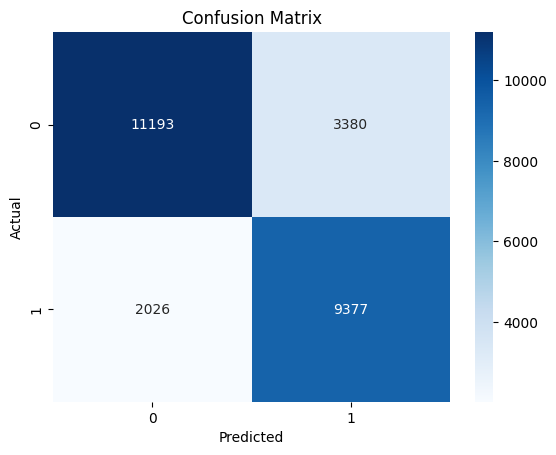

In [113]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_biz, y_pred_biz))

# Confusion matrix (optional visualization)
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_biz, y_pred_biz)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Training and Testing set metrics are compared below to ensure no overfitting problem. Since all metrics are within 0.5% difference, we can conclude that no overfitting problem in this model.**

In [115]:
print("-----------Train set Score (ANN Pre-Flight)-----------")
print("Accuracy Score:", metrics.accuracy_score(y_train_biz,y_train_pred_biz))
print("Precision:", metrics.precision_score(y_train_biz,y_train_pred_biz))
print("Recall:", metrics.recall_score(y_train_biz,y_train_pred_biz))
print()
print("-----------Test set Score (ANN Pre-Flight)-----------")
print("Accuracy Score:", metrics.accuracy_score(y_test_biz,y_pred_biz))
print("Precision:", metrics.precision_score(y_test_biz,y_pred_biz))
print("Recall:", metrics.recall_score(y_test_biz,y_pred_biz))

-----------Train set Score (ANN Pre-Flight)-----------
Accuracy Score: 0.7937230520480444
Precision: 0.7328372350084876
Recall: 0.8245863409217101

-----------Test set Score (ANN Pre-Flight)-----------
Accuracy Score: 0.7918848167539267
Precision: 0.7350474249431684
Recall: 0.8223274576865737


### 3.3.4 ANN Model (Pre-Booking Model)
Same rationales as the decision tree model above. Use the same train set variables in the prediction model for actual business use.

Variables Used:

Removed all post-flight survey responses and included only demographic variables:

- Gender  
- Customer Type  
- Age  
- Type of Travel (Business/Personal)  

#### Preparing Dataset

In [118]:
# Transform a new training dataset only including demographic Data

x_train_before = x_train_ann[['Gender_Male', 'Gender_Female', 
                       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 
                       'Age', 
                       'Type of Travel_Personal Travel', 'Type of Travel_Business travel', 
                       ]]
y_train_before = y_train_ann

# Transform a new testing dataset only including demographic Data
x_test_before = x_test_ann[['Gender_Male', 'Gender_Female', 
                       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 
                       'Age', 
                       'Type of Travel_Personal Travel', 'Type of Travel_Business travel', 
                       ]]
y_test_before = y_test_ann


# Check the dataset
x_train_before.head()

,Gender_Male,Gender_Female,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Age,Type of Travel_Personal Travel,Type of Travel_Business travel
0,1,0,1,0,-1.745279,1,0
1,1,0,0,1,-0.951360,0,1
2,0,1,1,0,-0.885200,0,1
3,0,1,1,0,-0.951360,0,1
4,1,0,1,0,1.430397,0,1


#### MLPclassifier
To check the potential of dataset with simple parameters

In [120]:
# clf is a commonly used variable name to indicate that the model is a classifier
clf = MLPClassifier(solver='adam',
                    activation='relu',
                    hidden_layer_sizes=(10,10,10), # edit this line to change the structure of hidden layer(s)
                    learning_rate_init=0.001,
                    random_state=1)
clf.fit(x_train_before, y_train_before)
print("*****Score (mean accuracy - train set)*******\n", clf.score(x_train_before, y_train_before))
print("*****Score (mean accuracy - test set)*******\n", clf.score(x_test_before, y_test_before))

*****Score (mean accuracy - train set)*******
 0.782376039421004
*****Score (mean accuracy - test set)*******
 0.7790267939636588


#### Tensorflow Hyperparameter Tuning
As the result in the above MPLclassifier is good, we will use the tensorflow package to find the best parameters for the model.

In [122]:
def build_model_before(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(x_train_before.shape[1],)))

    # Tune number of layers and units
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=8, max_value=128, step=8),
            activation='relu'
        ))

    # Optional: Tune dropout rate
    model.add(keras.layers.Dropout(hp.Float("dropout", 0.0, 0.5, step=0.1)))

    # Output layer for binary classification
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [123]:
tuner_before = Hyperband(
    build_model_before,
    objective='val_accuracy',
    max_epochs=200,
    factor=3,
    directory='my_tuner_dir',
    project_name='Tenserflow_before'
)

Reloading Tuner from my_tuner_dir/Tenserflow_before/tuner0.json


In [124]:
# Use the same parameter as above

x_train_before_split, x_val_before_split, y_train_before_split, y_val_before_split = train_test_split(x_train_before, 
                                              y_train_before, test_size=0.2, random_state=42, 
                                              stratify=y_train_before)

tuner_before.search(x_train_before_split, y_train_before_split,
             validation_data=(x_val_before_split, y_val_before_split),
             epochs=200,
             batch_size=128,
            callbacks=[early_stopping])

#### Best Parameters
Get the best Parameters from the tuner search above

In [126]:
best_hps_before = tuner_before.get_best_hyperparameters(num_trials=1)[0]

# Print all tuned hyperparameters
for param in best_hps_before.values:
    print(f"{param}: {best_hps_before.get(param)}")

num_layers: 3
units_0: 24
dropout: 0.1
learning_rate: 0.0001
units_1: 40
units_2: 40
tuner/epochs: 67
tuner/initial_epoch: 23
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0227


In [127]:
# Summary of layers, nodes and parameters

best_model_before = tuner_before.get_best_models(num_models=1)[0]
best_model_before.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         1,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,873 (11.22 KB)

 Trainable params: 2,873 (11.22 KB)

 Non-trainable params: 0 (0.00 B)

#### Train the Model with Best Parameters

In [129]:
# Build and train the model with best hyperparameters
best_model_before = tuner_before.hypermodel.build(best_hps_before)

best_model_before.fit(
    x_train_before, y_train_before,
    epochs=400,
    batch_size=128,
)

Epoch 1/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - accuracy: 0.5934 - loss: 0.6605  
Epoch 2/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.7808 - loss: 0.5024
Epoch 3/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.7793 - loss: 0.5032
Epoch 4/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.7806 - loss: 0.5004
Epoch 5/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.7808 - loss: 0.4981
Epoch 6/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.7802 - loss: 0.4995
Epoch 7/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.7832 - loss: 0.4955
Epoch 8/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.7821 - loss: 0.4979
Epoch 9/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.7801 - loss: 0.4995
Epoch 10/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.7822 - loss: 0.4970
Epoch 11/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.7811 - loss: 0.4970
Epoch 12/400
812/

#### Performance

In [131]:
# Get the prediction from test set
y_pred_probs_before = best_model_before.predict(x_test_before)
# Transform the probability to value 0 or 1
y_pred_before = (y_pred_probs_before > 0.5).astype(int)

# Get the prediction from train set
y_train_pred_probs_before = best_model_before.predict(x_train_before)
# Transform the probability to value 0 or 1
y_train_pred_before = (y_train_pred_probs_before > 0.5).astype(int)

812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 1s 172us/step


**Classification report and confusion matrix are drawn below for model performance**

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     14573
           1       0.73      0.80      0.76     11403

    accuracy                           0.78     25976
   macro avg       0.78      0.78      0.78     25976
weighted avg       0.78      0.78      0.78     25976



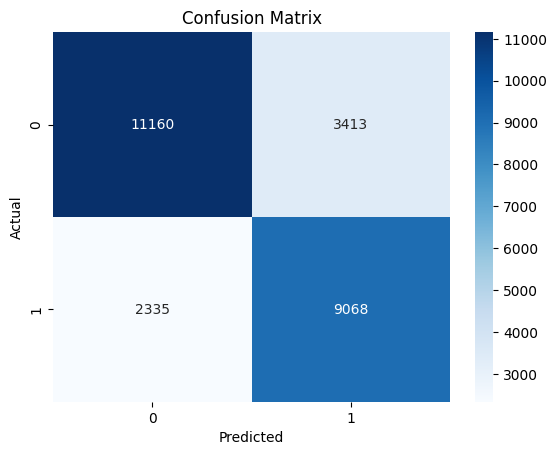

In [133]:
print(classification_report(y_test_before, y_pred_before))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_before, y_pred_before)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Training and Testing set metrics are compared below to ensure no overfitting problem. Since all metrics are within 0.5% difference, we can conclude that no overfitting problem in this model.**

In [135]:
print("-----------Train set Score (ANN Pre-Booking)-----------")
print("Accuracy Score:", metrics.accuracy_score(y_train_before,y_train_pred_before))
print("Precision:", metrics.precision_score(y_train_before,y_train_pred_before))
print("Recall:", metrics.recall_score(y_train_before,y_train_pred_before))
print()
print("-----------Test set Score (ANN Pre-Booking)-----------")
print("Accuracy Score:", metrics.accuracy_score(y_test_before,y_pred_before))
print("Precision:", metrics.precision_score(y_test_before,y_pred_before))
print("Recall:", metrics.recall_score(y_test_before,y_pred_before))

-----------Train set Score (ANN Pre-Booking)-----------
Accuracy Score: 0.7824049122266707
Precision: 0.7258038520428721
Recall: 0.8001332593003887

-----------Test set Score (ANN Pre-Booking)-----------
Accuracy Score: 0.7787188173698799
Precision: 0.7265443474080603
Recall: 0.795229325616066


### 3.3.5 ANN Model - Complexity Check
For this section, we will only use the pre-booking model as a prototype to see will a even more complex model improve the performance of models before implementing to other models

#### Tensorflow Hyperparameter Tuning - Complex Version

In [138]:
def build_model_before_complex(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(x_train_before.shape[1],)))

    # Increased no. of layers to 5 and no. of nodes to 512
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=8, max_value=512, step=8),
            activation='relu'
        ))

    # Tune dropout rate (same as above)
    model.add(keras.layers.Dropout(hp.Float("dropout", 0.0, 0.5, step=0.1)))

    # Output layer for binary classification (Same as above)
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tune learning rate (increased to 1e-6 and 1e-7)
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [139]:
# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=20,          # Stop after 20 epochs with no improvement (increased from 10-20)
    restore_best_weights=True  # Restore the best weights (from the epoch with the lowest validation loss)
)

In [140]:
tuner_before_complex = Hyperband(
    build_model_before,
    objective='val_accuracy',
    max_epochs=400, #increased max_epochs
    factor=3,
    directory='my_tuner_dir',
    project_name='Tenserflow_before_complex'
)

Reloading Tuner from my_tuner_dir/Tenserflow_before_complex/tuner0.json


In [141]:
# Use the same parameter as above

x_train_before_split, x_val_before_split, y_train_before_split, y_val_before_split = train_test_split(x_train_before, 
                                              y_train_before, test_size=0.2, random_state=42, 
                                              stratify=y_train_before)

tuner_before_complex.search(x_train_before, y_train_before,
             validation_data=(x_val_before_split, y_val_before_split),
             epochs=400,
             batch_size=256,
            callbacks=[early_stopping])

#### Best Parameters
The best parameters shown here is more or less the same as the simpler model above

In [143]:
best_hps_before_complex = tuner_before_complex.get_best_hyperparameters(num_trials=1)[0]

# Print all tuned hyperparameters
for param in best_hps_before_complex.values:
    print(f"{param}: {best_hps_before_complex.get(param)}")

num_layers: 3
units_0: 48
dropout: 0.2
learning_rate: 0.001
units_1: 8
units_2: 32
tuner/epochs: 45
tuner/initial_epoch: 15
tuner/bracket: 3
tuner/round: 1
tuner/trial_id: 0635


In [144]:
best_model_before_complex = tuner_before_complex.get_best_models(num_models=1)[0]
best_model_before_complex.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 48)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,097 (4.29 KB)

 Trainable params: 1,097 (4.29 KB)

 Non-trainable params: 0 (0.00 B)

#### Train the Model with Best Parameters

In [146]:
# Build and train the model with best hyperparameters
best_model_before_complex = tuner_before_complex.hypermodel.build(best_hps_before_complex)

best_model_before_complex.fit(
    x_train_before, y_train_before,
    epochs=400,
    batch_size=128,
)

Epoch 1/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 358us/step - accuracy: 0.7572 - loss: 0.5430  
Epoch 2/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.7817 - loss: 0.5026
Epoch 3/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.7803 - loss: 0.5026
Epoch 4/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.7825 - loss: 0.4998
Epoch 5/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - accuracy: 0.7813 - loss: 0.5007
Epoch 6/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.7813 - loss: 0.4989
Epoch 7/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.7804 - loss: 0.5009
Epoch 8/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.7839 - loss: 0.4960
Epoch 9/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.7819 - loss: 0.4992
Epoch 10/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.7825 - loss: 0.4981
Epoch 11/400
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.7802 - loss: 0.4987
Epoch 12/400
812/

#### Performance

Although we further extended the range of parameters, the model performance is even worse than the simpler model. This could be due to the ramdom state of validation split during the hyperparameter tuning process.

However, we can conclude here that, a more complex model will not have significant improve to the model. In order to balance the computational time and final outcome, we will stay on the simpler hyperparameter tuning for each model.

In [148]:
y_pred_probs_before_complex = best_model_before_complex.predict(x_test_before)
y_pred_before_complex = (y_pred_probs_before_complex > 0.5).astype(int)
y_train_pred_probs_before_complex = best_model_before_complex.predict(x_train_before)
y_train_pred_before_complex = (y_train_pred_probs_before_complex > 0.5).astype(int)

812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step
3247/3247 ━━━━━━━━━━━━━━━━━━━━ 1s 185us/step


              precision    recall  f1-score   support

           0       0.83      0.76      0.79     14573
           1       0.73      0.80      0.76     11403

    accuracy                           0.78     25976
   macro avg       0.78      0.78      0.78     25976
weighted avg       0.78      0.78      0.78     25976



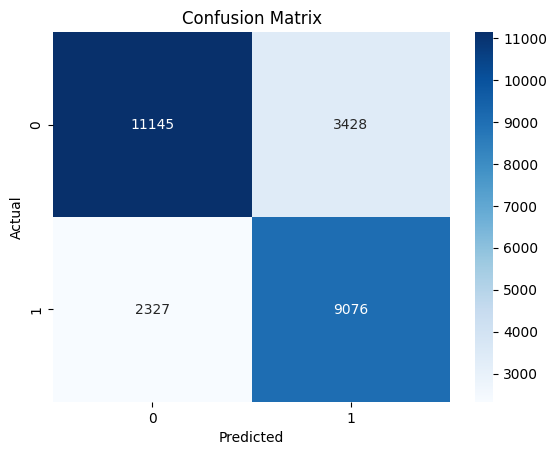

In [149]:
print(classification_report(y_test_before, y_pred_before_complex))

# Confusion matrix (optional visualization)
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_before, y_pred_before_complex)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [150]:
print("-----------Train set Score (ANN Pre-Booking Complex)-----------")
print("Accuracy Score:", metrics.accuracy_score(y_train_before,y_train_pred_before_complex))
print("Precision:", metrics.precision_score(y_train_before,y_train_pred_before_complex))
print("Recall:", metrics.recall_score(y_train_before,y_train_pred_before_complex))
print()
print("-----------Test set Score (ANN Pre-Booking Complex)-----------")
print("Accuracy Score:", metrics.accuracy_score(y_test_before,y_pred_before_complex))
print("Precision:", metrics.precision_score(y_test_before,y_pred_before_complex))
print("Recall:", metrics.recall_score(y_test_before,y_pred_before_complex))

-----------Train set Score (ANN Pre-Booking Complex)-----------
Accuracy Score: 0.7818852017246689
Precision: 0.7247798640987495
Recall: 0.8007107162687396

-----------Test set Score (ANN Pre-Booking Complex)-----------
Accuracy Score: 0.7784493378503233
Precision: 0.7258477287268075
Recall: 0.7959308953784092


# 4. Model Evaluations and Performance

## 4.1 Logistic Regression Model
The model is evaluated based on its two outputs: y_pred and y_prob. These are presented in a Classification Report:
1. **Precision**: how many predicted positives were actually correct
2. **Recall**: how many actual positives were correctly identified
3. **F1-score**: a balance between precision and recall
4. **Accuracy**: the overall correctness of the predictions
5. **ROC-AUC**: this score measures the model’s ability to distinguish between the two classes (satisfied vs. not satisfied) across all possible thresholds. A higher score indicates better predictive performance.

With an accuracy score of 87%, this places the model to be more reliable than the example ones. Furthermore, as mentioned in section 3.1.3, the model's hyperparameters were tuned using Gridsearch for the best possible parameters.

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



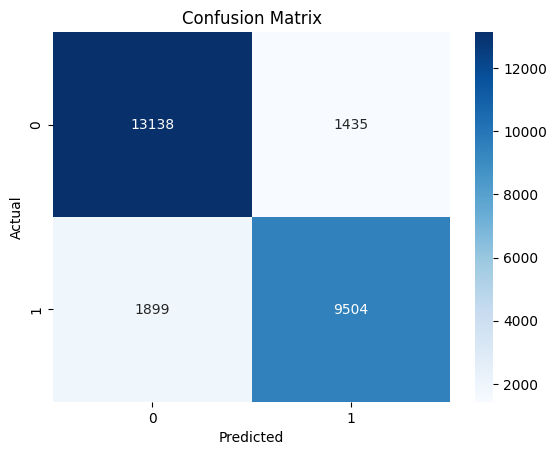

In [154]:
print(classification_report(y_test_lr, y_pred_lr))

# Confusion matrix (optional visualization)
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_lr, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [155]:
print("-----------Train set Score (Logistic Regression) -----------")
print("Accuracy Score:", metrics.accuracy_score(y_train_lr,y_train_pred_lr))
print("Precision:", metrics.precision_score(y_train_lr,y_train_pred_lr))
print("Recall:", metrics.recall_score(y_train_lr,y_train_pred_lr))
print()
print("-----------Test set Score (Logistic Regression) -----------")
print("Accuracy Score:", metrics.accuracy_score(y_test_lr,y_pred_lr))
print("Precision:", metrics.precision_score(y_test_lr,y_pred_lr))
print("Recall:", metrics.recall_score(y_test_lr,y_pred_lr))

-----------Train set Score (Logistic Regression) -----------
Accuracy Score: 0.8751154912226671
Precision: 0.8704829722793794
Recall: 0.8362243198223209

-----------Test set Score (Logistic Regression) -----------
Accuracy Score: 0.8716507545426547
Precision: 0.8688179906755645
Recall: 0.8334648776637726


## 4.2 Decision Tree Model
As outlined in section 3.3, various versions of the Decision Tree Model typically compare whether the use of the Gini impurity index or entropy score would prove to be more reliable in illuminating key aspects that lead to improved customer satisfaction. 

In [157]:
print("\nTuned Gini Accuracy:", accuracy_score(y_val, y_pred_tuned))
print("\nTuned Gini Classification Report:\n", classification_report(y_val, y_pred_tuned))
print("Tuned Gini Confusion Matrix:\n", confusion_matrix(y_val, y_pred_tuned))
print("Best Entropy Parameters:", grid_search_entropy.best_params_)
print("Tuned Entropy Accuracy:", accuracy_score(y_val, y_pred_entropy_tuned))
print("\nTuned Entropy Classification Report:\n", classification_report(y_val, y_pred_entropy_tuned))
print("Tuned Entropy Confusion Matrix:\n", confusion_matrix(y_val, y_pred_entropy_tuned))


Tuned Gini Accuracy: 0.9506467508469356

Tuned Gini Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     14622
           1       0.95      0.94      0.94     11354

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Tuned Gini Confusion Matrix:
 [[14058   564]
 [  718 10636]]
Best Entropy Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 20}
Tuned Entropy Accuracy: 0.9506467508469356

Tuned Entropy Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     14622
           1       0.95      0.94      0.94     11354

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Tuned Entrop

Not only was the overall accuracy of the chosen classifier(Gini) tested against Entropy, but the distributions between the training and testing predictions were also tested. This was done to ensure the model is not biased and is producing realistic class predictions. As a result, the differences in the training and test sets are minor. There is a 0.04% difference for both distributions across training and test prediction data. 

## 4.3 Artificial Neural Network

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14573
           1       0.98      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



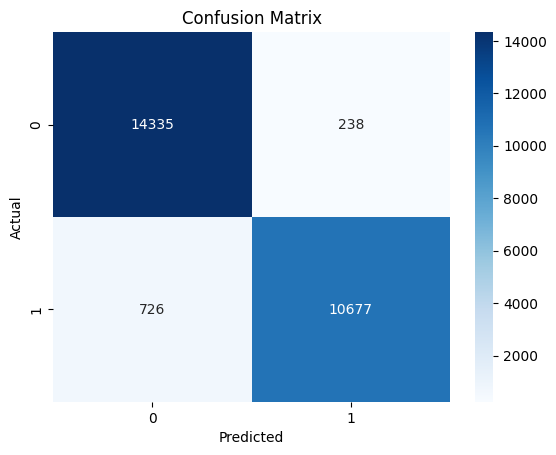

In [160]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_ann, y_pred_ann))

# Confusion matrix (optional visualization)
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_ann, y_pred_ann)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [161]:
print("-----------Train set Score (ANN with all Variables)-----------")
print("Accuracy Score:", metrics.accuracy_score(y_train_ann,y_train_pred_ann))
print("Precision:", metrics.precision_score(y_train_ann,y_train_pred_ann))
print("Recall:", metrics.recall_score(y_train_ann,y_train_pred_ann))
print()
print("-----------Test set Score (ANN with all Variables)-----------")
print("Accuracy Score:", metrics.accuracy_score(y_test_ann,y_pred_ann))
print("Precision:", metrics.precision_score(y_test_ann,y_pred_ann))
print("Recall:", metrics.recall_score(y_test_ann,y_pred_ann))

-----------Train set Score (ANN with all Variables)-----------
Accuracy Score: 0.968798121342778
Precision: 0.9874244651314715
Recall: 0.9399666851749028

-----------Test set Score (ANN with all Variables)-----------
Accuracy Score: 0.9628888204496459
Precision: 0.9781951442968392
Recall: 0.9363325440673507


# 5. Conclusion on Model Application
## 5.1 Business Insights
By looking at the model performance metrics, decision tree and artificial neural network (ANN) are both out-performing Logistics regression. However, Logistics regression still has its value as it can show the impact and importance of different variables in the survey. Both decision tree and logistic regression models are good at providing business insights. Therefore, we suggest to use both models for business insights in the future. All variables should be included in the model, so to find out the impactful variables behind customer satisfaction.

**Variables: All**

**Models: Decision Tree (3.3.5) and Logistic Regression (3.1.4)**


## 5.2 Business Application
Apart from getting insights from the statistic models, it is also important to be able to predict customer satisfaction in 2 scenarios: pre-flight and pre-booking. For pre-flight scenario, airline company can identify unsatisfied customer to see any upgradable potential or other service related promotion to increase the satisfaction of customers and convert them to loyal customers. For pre-booking scenario, airline company can identify potential loyal customer by their demographic information. Airline company can then target the customer with marketing campaigns or promotion.

By looking at the model peformance metrics, ANN is marginally performing better than decision tree (logistic regression is not included here due to its lower accuracy shown in previous section). Also, the metrics of training and testing sets are within 0.5% difference, which show a low chance of overfitting for actual model. In the nature of business prediction, it is better to only use one model for the final output. In this case, we will use ANN as the final model.

**Scenario: Pre-Flight**

**Varibles: Gender, Customer Type, Age, Type of Travel (Business/Personal), Class (Business/Eco/Eco Plus), Flight Distance**

**Models: Artificial Neural Network (3.3.3)**

---------------------------------------------------------------

**Scenario: Pre-Booking**

**Varibles: Gender, Customer Type, Age, Type of Travel (Business/Personal)**

**Models: Artificial Neural Network (3.3.4)**

# 6 Sample Code Comparison
## 6.1 Example Models
To begin with, the two example codes being used are the Random Forest Classifier and XGB Gradient Boosting Classifiers. Both of the provided codes are examples of ensemble-based models, and the provided report from previous colleagues shows us the classification performance of these models. On average the report outlines that there is an overall accuracy of 80% for both models. Furthermore, for both models, precision stands at 84% in identifying dissatisfied passengers, on average, 76.5% for identifying satisfied customers. 

## 6.2 Differences
The difference between these two models in the example and the decision tree the team opted for a Decision Tree Classifier that focused more on the Gini index. Another difference is how the two models were tuned to reach the best parameters. The team's model used GridSearch, whilst the example uses RandomizedSearch. The final difference is that the report lacks any form of test for overfitting within its models, so there is no comparison to be able to be made. This test should be important for XGB Gradient Boosting models as they are prone to excessive overfitting (Ahmetoglu and Das., 2022)

Also, the input variables in the final models are different. In business context, the sample code is predicting the customer satisfaction right after the plane has landed (as they included flight delays). However, we think that the business insight or application from these variables are not valuable to company. It is difficult for airline company to follow up even though they can predict the customer to be unsatisfied. If we can predict who have a higher probability of satisfaction or dissatisfaciton before the flight happen, airline company could have rooms to improve or take actions.

## 6.3 How is the Decision Tree Model better?
To begin with, when comparing the provided classification results in the example report with the team's new model, there is a vast improvement. Whilst the accuracy of the two ensemble models sits at 80%, the team's Decision tree models have over 95%. This imperative is within the business context, as the decision tree can more accurately detect satisfied and dissatisfied customers. Through this, the model will be able to more accurately predict certain key aspects that satisfy customers. There is the argument that the Decision Tree model is prone to overfitting, but the provided experiment between the training and test satisfaction distribution, where both distributions are almost equal, proves that overfitting and bias are minimal.

## 6.4 Choices of Final Models
In terms of business insights, our logistic regression and decision tree models are definitely out-performing the sample codes. Since the sample codes are mixing different statistical model using emsemble, or slicing the dataset apart using Random forest/gradient boosting. They are not able to capture a full picture. Also, they did not include any variable from customer satisfaction surveys, which means the model cannot identify which elements are impacting customer satisfaction.

In terms of business application, although we do not agree with the variable selection of the sample codes, it will depend on the business context the company needed. In terms of performance, our ANN models are slightly under-perform comparing to the sample codes. However, the difference can be ignored if the scenario is more suitable for company's follow up, since our ANN models are having 70% - 80% of accuracy in terms of all metrics.

In [164]:
# Convert training labels (0 and 1) back to original class names
decoded_train_labels = label_encoder.inverse_transform(df["satisfaction"])

# Get normalized distribution
train_distribution = pd.Series(decoded_train_labels).value_counts(normalize=True) * 100
test_distribution = pd.Series(test_predicted_labels).value_counts(normalize=True) * 100

# Combine into one DataFrame
comparison_df = pd.DataFrame({
    "Training Data (%)": train_distribution.round(2),
    "Test Predictions (%)": test_distribution.round(2)
})

# Display result
print("Training vs Test Satisfaction Distribution:")
print(comparison_df)

Training vs Test Satisfaction Distribution:
                         Training Data (%)  Test Predictions (%)
neutral or dissatisfied              56.55                 56.61
satisfied                            43.45                 43.39


# 7. Business Insights
ANN does not have clear business insight, as it works like a black box. Therefore, ANN will be excluded from this session

## 7.1 Insights from Logistics Regression

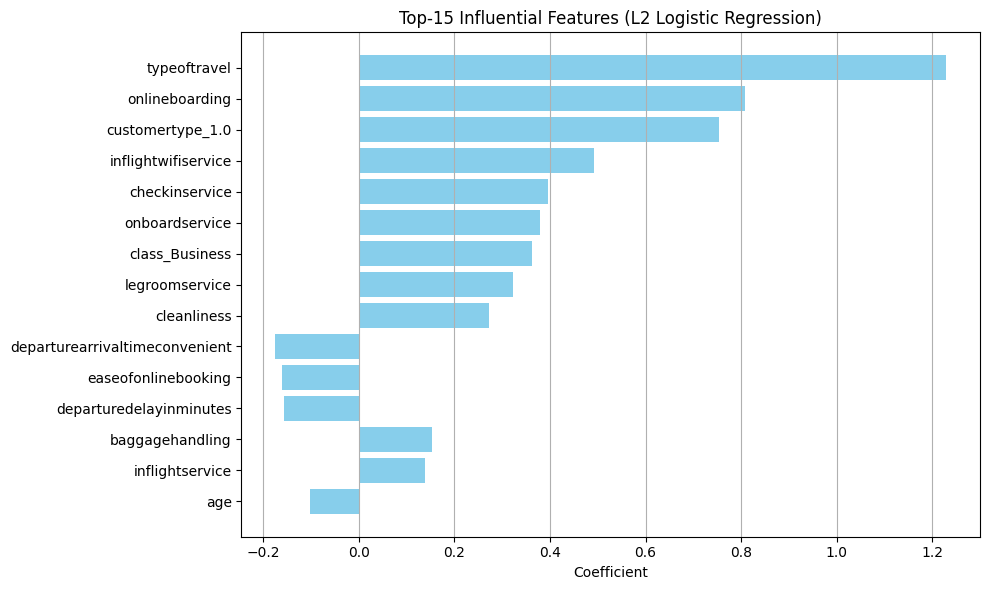

In [167]:
top15 = coef_df.head(15).iloc[::-1]
plt.figure(figsize=(10, 6))
plt.barh(top15['Feature'], top15['Coefficient'], color='skyblue')
plt.title('Top‑15 Influential Features (L2 Logistic Regression)')
plt.xlabel('Coefficient')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

The coeffients are stored and sorted to a dataframe, revealing the Top 15 features as a list and bar graph.

**Positive Drivers of Customer Satisfaction**:
1. **Type of Travel (Business Travel)**:
The strongest positive feature was business travel, indicating that business travelers typically report higher levels of satisfaction compared to leisure travelers. This could reflect differences in expectations, services provided, or targeted amenities tailored specifically for business travelers.
<br>**Recommendation**:
Continue investing in services and amenities that specifically appeal to business travelers, such as improved connectivity, expedited boarding, loyalty rewards, and enhanced comfort.

2. **Online Boarding Experience**:
A smooth and efficient online boarding process strongly contributed to satisfaction. Customers who rated this aspect positively were significantly more satisfied, reflecting the importance of convenience and efficiency in the customer journey.
<br>**Recommendation**:
Maintain or further enhance digital boarding processes, focusing on speed, reliability, and ease of use. Minimizing technical issues or delays during check-in and boarding will further enhance customer perception.

3. **Customer Loyalty (Loyal Customers)**:
Customers identified as loyal showed a substantially higher likelihood of reporting satisfaction. This correlation highlights the critical role of loyalty programs or customer relationship management strategies in driving satisfaction.
<br>**Recommendation**:
Strengthen customer loyalty initiatives. Personalizing rewards, recognizing frequent travelers, and proactively addressing loyal customers' needs can further increase their satisfaction and retention.

4. **Inflight Wi-Fi Service**:
Reliable inflight Wi-Fi service had a notably positive impact on satisfaction. Travelers increasingly value connectivity, and quality internet access greatly enhances the onboard experience.
<br>**Recommendation**:
Invest in improving onboard connectivity and reliability of Wi-Fi services. Clearly communicate any upgrades or enhancements to customers to positively influence their perception of inflight services.

5. **Check-in Service and Onboard Service Quality**:
High-quality interactions at check-in and onboard significantly boosted customer satisfaction, underscoring the importance of front-line employee interactions and service delivery.
<br>**Recommendation**:
Ensure ongoing employee training, maintaining high standards in customer service. Regularly monitor customer feedback regarding interactions with staff and respond promptly to areas of concern.


**Key Negative Drivers of Customer Satisfaction**:
1. **Arrival Delay in Minutes**:
Arrival delays had a strong negative impact on customer satisfaction. Even relatively minor delays can lead to substantial dissatisfaction, especially for business travelers who value punctuality highly.
<br>**Recommendation**:
Focus operational improvements on reducing delays. Where delays are unavoidable, communicate proactively, clearly, and frequently to passengers to minimize frustration.

2. **Economy Class Travel (Class Eco and Eco Plus)**:
Passengers in both Eco and Eco Plus classes were generally less satisfied compared to Business class passengers, with Economy class travelers showing notably lower satisfaction. This highlights disparities in service levels, comfort, or amenities between classes.
<br>**Recommendation**:
Consider targeted improvements in economy-class offerings. Even minor enhancements—such as improved seat comfort, inflight amenities, or service quality—can significantly boost overall satisfaction levels within these classes.

3. **Departure Delay in Minutes**:
Similar to arrival delays, delays in departure negatively impacted customer satisfaction, reinforcing the importance of schedule adherence.
<br>**Recommendation**:
Aim for greater operational efficiency and contingency planning to minimize delays at departure. Transparent and timely updates are essential when delays are unavoidable.

4. **Ease of Online Booking**:
Lower satisfaction with the online booking process negatively affected overall customer satisfaction. Difficulty in booking may cause initial frustration that carries forward into the entire travel experience.
<br>**Recommendation**:
Optimize the online booking platform to ensure an intuitive, quick, and error-free booking experience. Continuously monitor customer feedback to identify areas requiring attention or improvements.

## 7.2 Insights from Decision Tree Models
### From the Decision Tree Visualisation
The actual visualisation of the decision tree does provide insight into what is the most important feature in deciding whether a customer is predicted to be satisfied or not, that being the online booking process. This provides insight into the importance for the airline to ensure that the online boarding experience for customers is a priority. 

### From The Bar Graph (Feature Importance)
Similarly to the visualisation of the Decision Tree, the online booking process is listed as the most important feature in deciding whether a customer is satisfied with the airline service or not. The provided results also provide clearer insight into other services of the airline that are heavily involved with customer satisfaction, such as the type of travel the customer has, or the quality of in-flight wifi service. The results are similar to the decision tree visualisation, providing valuable insight into the services the airline must focus on to maximise customer satisfaction.

### Two Models (Pre-Booking)
These two models remove the survey aspect of the dataset entirely and focus primarily on the services that are available before boarding the plane and before booking their flight. Business insights that can be gained from the first decision tree (features before boarding), include aspects such as identifying possible improvements to the experience of certain travellers on the airline (eg. economy business travellers). As the second model focuses more on the passenger profile data, it can garner marketing insights into identifying certain demographics that may be interested in the airline. This can lead to the creation of personalised promotion events for these passengers or even improved loyalty programs, all with the goal of not just improving customer satisfaction but possibly attracting new customers

# 8. Summary

Throughout the report, we constructed logistic regression, decision tree and artificial neural network models with different variables to cater different business needs. All models are checked with metrics including (accuracy, precision and recall) comparing training and testing data.

For ***Business insights***, our logistic regression and decision tree models identify below significant variables which are impacting customer satisfaction in the historical data.

**Key Positive Drivers of Customer Satisfaction:**

Type of Travel (Business Travel), Online Boarding Experience, Inflight Wi-Fi Service, Check-in Service and Onboard Service Quality

**Key Negative Drivers of Customer Satisfaction:**

Arrival / Departure Delay in Minutes, Economy Class Travel (Class Eco and Eco Plus), Ease of Online Booking

-------------------

For future use of ***business application***, we suggest the below model to gain business insights and predict passenger satisfaction for follow-up actions.

**Goal: Gaining Business Insights**

*Variables: All*

*Models: Decision Tree (3.3.5) and Logistic Regression (3.1.4)*

*Action: Gain business insights for improvement*

**Goal: Predict Customer Satisfaction**

***Scenario: Pre-Flight***

*Varibles: Gender, Customer Type, Age, Type of Travel (Business/Personal), Class (Business/Eco/Eco Plus), Flight Distance*

*Models: Artificial Neural Network (3.3.3)*

*Action: identify potential unsatisfied customers for early intervention like providing promotion vouchers or potential upgrade*

***Scenario: Pre-Booking***

*Varibles: Gender, Customer Type, Age, Type of Travel (Business/Personal)*

*Models: Artificial Neural Network (3.3.4)*

*Action: identify potential loyal customers for marketing campaigns or promotions*

# 9. Reference

Ahmetoglu, H., & Das, R. (2022). A comprehensive review on detection of cyber-attacks: Data sets, methods, challenges, and future research directions. Internet of Things, 20, 100615. https://doi.org/10.1016/j.iot.2022.100615

Liu, X., Tao, F., & Yu, W. (2020). A neural network enhanced system for learning nonlinear constitutive law and failure initiation criterion of composites using indirectly measurable data. Composite Structures, 252, 112658. https://doi.org/10.1016/j.compstruct.2020.112658

Noviantoro, T., & Huang, J.-P. (2021). Investigating airline passenger satisfaction: Data mining method. Research in Transportation Business & Management, 43, 100726. https://doi.org/10.1016/j.rtbm.2021.100726

OpenAI. (2025). ChatGPT (Version 4) [AI model]. Available at: https://www.openai.com/chatgpt

